<a href="https://colab.research.google.com/github/LyanhVini/UX-Tracking-Data-Clustering/blob/main/Minisom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

In [ ]:
from minisom import MiniSom

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file

# display matplotlib plots in notebook
%matplotlib inline
# display bokeh plot in notebook
output_notebook()

### Carregando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Pesquisas e Projetos/UX - Tracking/Traços/trace1.csv')
df1['user'] = 1

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Pesquisas e Projetos/UX - Tracking/Traços/trace2.csv')
df2['user'] = 2

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Pesquisas e Projetos/UX - Tracking/Traços/trace3.csv')
df3['user'] = 3

In [ ]:
df3

,site,type,time,image,class,id,mouseClass,mouseId,x,y,keys,scroll,height,user
0,www.amazon.com,eye,7,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5412.0,3
1,www.amazon.com,freeze,7,0.jpg,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5412.0,3
2,www.amazon.com,eye,7,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5412.0,3
3,www.amazon.com,eye,8,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5412.0,3
4,www.amazon.com,freeze,8,0.jpg,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5412.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14961,www.amazon.com,eye,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
14962,www.amazon.com,eye,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
14963,www.amazon.com,freeze,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,864.0,24.0,NaN,0.0,5409.0,3
14964,www.amazon.com,eye,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3


In [ ]:
print(len(df1) + len(df2) + len(df3))

50467


In [ ]:
df1.site.unique()

array(['www.amazon.com', 'www.aboutamazon.com'], dtype=object)

In [ ]:
df2.site.unique()

array(['www.amazon.com', 'www.google.com', 'www.bramazonforum.com'],
      dtype=object)

In [ ]:
df3.site.unique()

array(['www.amazon.com', 'www.google.com', 'www.bramazonforum.com'],
      dtype=object)

### Concatenando e pré-processando os dados

In [ ]:
df_combined = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_combined

,site,type,time,image,class,id,mouseClass,mouseId,x,y,keys,scroll,height,user
0,www.amazon.com,eye,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
1,www.amazon.com,freeze,2,0.jpg,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5960.0,1
2,www.amazon.com,eye,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
3,www.amazon.com,eye,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
4,www.amazon.com,move,2,0.jpg,nav-input nav-progressive-attribute,twotabsearchtextbox,nav-input nav-progressive-attribute,twotabsearchtextbox,1077.0,13.0,NaN,0.0,5960.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50462,www.amazon.com,eye,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
50463,www.amazon.com,eye,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
50464,www.amazon.com,freeze,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,864.0,24.0,NaN,0.0,5409.0,3
50465,www.amazon.com,eye,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3


In [ ]:
df_combined.type.unique()

array(['eye', 'freeze', 'move', 'wheel', 'click', 'keyboard'],
      dtype=object)

In [ ]:
df_combined['type'], categorias = pd.factorize(df_combined['type'])
df_combined['site'], categorias = pd.factorize(df_combined['site'])
df_combined

,site,type,time,image,class,id,mouseClass,mouseId,x,y,keys,scroll,height,user
0,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
1,0,1,2,0.jpg,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5960.0,1
2,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
3,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
4,0,2,2,0.jpg,nav-input nav-progressive-attribute,twotabsearchtextbox,nav-input nav-progressive-attribute,twotabsearchtextbox,1077.0,13.0,NaN,0.0,5960.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50462,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
50463,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
50464,0,1,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,864.0,24.0,NaN,0.0,5409.0,3
50465,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3


In [ ]:
quantidade_nulos = df_combined['x'].isnull().sum()
print(quantidade_nulos)

2688


In [ ]:
df = df_combined.dropna(subset=['x'])
df

,site,type,time,image,class,id,mouseClass,mouseId,x,y,keys,scroll,height,user
0,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
1,0,1,2,0.jpg,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5960.0,1
2,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
3,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0,1
4,0,2,2,0.jpg,nav-input nav-progressive-attribute,twotabsearchtextbox,nav-input nav-progressive-attribute,twotabsearchtextbox,1077.0,13.0,NaN,0.0,5960.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50462,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
50463,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3
50464,0,1,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,864.0,24.0,NaN,0.0,5409.0,3
50465,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0,3


In [ ]:
df.site.unique()

array([0, 1, 2, 3])

In [ ]:
t = df['user'].values
df = df[df.columns[:-1]]
t

array([1, 1, 1, ..., 3, 3, 3])

In [ ]:
df

,site,type,time,image,class,id,mouseClass,mouseId,x,y,keys,scroll,height
0,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0
1,0,1,2,0.jpg,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5960.0
2,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0
3,0,0,2,0.jpg,NaN,NaN,NaN,NaN,512.0,256.0,NaN,0.0,5960.0
4,0,2,2,0.jpg,nav-input nav-progressive-attribute,twotabsearchtextbox,nav-input nav-progressive-attribute,twotabsearchtextbox,1077.0,13.0,NaN,0.0,5960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50462,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0
50463,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0
50464,0,1,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,864.0,24.0,NaN,0.0,5409.0
50465,0,0,1149,20230770.4.jpg,NaN,NaN,nav-input nav-progressive-attribute,twotabsearchtextbox,512.0,256.0,NaN,0.0,5409.0


### Normalizando

In [ ]:
array = df[['type', 'x', 'y', 'scroll', 'height', 'site']].values
array

array([[0.000e+00, 5.120e+02, 2.560e+02, 0.000e+00, 5.960e+03, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.960e+03, 0.000e+00],
       [0.000e+00, 5.120e+02, 2.560e+02, 0.000e+00, 5.960e+03, 0.000e+00],
       ...,
       [1.000e+00, 8.640e+02, 2.400e+01, 0.000e+00, 5.409e+03, 0.000e+00],
       [0.000e+00, 5.120e+02, 2.560e+02, 0.000e+00, 5.409e+03, 0.000e+00],
       [0.000e+00, 5.120e+02, 2.560e+02, 0.000e+00, 5.409e+03, 0.000e+00]])

In [ ]:
array.shape

(47779, 6)

In [ ]:
min_values = array.min(axis=0)
max_values = array.max(axis=0)

# Aplica a normalização Min-Max
data_normalized = (array - min_values) / (max_values - min_values)
print(min_values)
print(max_values)
data_normalized

[  0.   0.   0.   0. 740.   0.]
[5.0000e+00 1.9190e+03 1.4691e+04 1.4077e+04 1.4909e+04 3.0000e+00]


array([[0.        , 0.26680563, 0.01742563, 0.        , 0.36840991,
        0.        ],
       [0.2       , 0.        , 0.        , 0.        , 0.36840991,
        0.        ],
       [0.        , 0.26680563, 0.01742563, 0.        , 0.36840991,
        0.        ],
       ...,
       [0.2       , 0.4502345 , 0.00163365, 0.        , 0.3295222 ,
        0.        ],
       [0.        , 0.26680563, 0.01742563, 0.        , 0.3295222 ,
        0.        ],
       [0.        , 0.26680563, 0.01742563, 0.        , 0.3295222 ,
        0.        ]])

In [ ]:
print(data_normalized.shape)

(47779, 6)


### Treinando o modelo

In [ ]:
# initialization and training of 15x15 SOM
som = MiniSom(10, 10, data_normalized.shape[1], sigma=1.5, learning_rate=.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)

som.train(data_normalized, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.33744192260300554


In [ ]:
som.winner(data_normalized[1])

(0, 6)

### Visualizando a clusterização

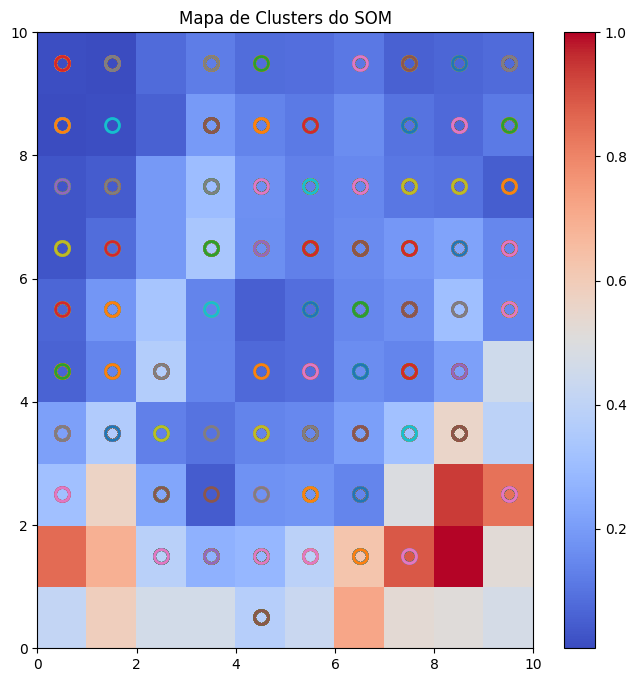

In [ ]:
# mapa de calor da distância entre neurônios
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Mapa de distância entre neurônios
plt.colorbar()

# marcadores para os pontos de dados no mapa SOM
for i, x in enumerate(data_normalized):
    w = som.winner(x)  # neurônio vencedor para o ponto de dados
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgewidth=2)

plt.title('Mapa de Clusters do SOM')
plt.show()

In [ ]:
data_normalized[6]

array([0.2       , 0.        , 0.        , 0.        , 0.36840991,
       0.        ])

#### Visualizando padrões de comportamento dos usuários

In [ ]:
data_point = data_normalized[11]  # Substitua 0 pelo índice do ponto de dados desejado

# Encontrando o neurônio vencedor (BMU) para esse ponto de dados
w = som.winner(data_point)
print("Coordenadas do BMU:", w)

data_associated_with_bmu = []

for i, x in enumerate(data_normalized):
    if som.winner(x) == w:
        data_associated_with_bmu.append(i)

print("Índices dos dados associados ao BMU (clusterização):", data_associated_with_bmu)

Coordenadas do BMU: (6, 1)
Índices dos dados associados ao BMU (clusterização): [7, 9, 10, 11, 13, 14, 17, 42, 43, 44, 45, 395, 397, 399, 400, 401, 529, 530, 825, 826, 3969, 3970, 3971, 3973, 3974, 3975, 3977, 3978, 3979, 3980, 3981, 4858, 4859, 4860, 4861, 4863, 4866, 4869, 4872, 4875, 4876, 4877, 4878, 33059, 33060, 33061]


In [ ]:
# Mostrando os dados similares (clusterizados)
data_associated_with_bmu = data_normalized[data_associated_with_bmu]
data_associated_with_bmu

array([[0.4       , 0.79051589, 0.01095909, 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.84054195, 0.01286502, 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.88483585, 0.0142264 , 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.90307452, 0.01436253, 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.90411673, 0.01436253, 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.90828557, 0.01415833, 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.90515894, 0.01436253, 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.91036998, 0.00102103, 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.91089109, 0.0010891 , 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.91297551, 0.0010891 , 0.        , 0.36840991,
        0.        ],
       [0.4       , 0.91036998, 0.0010891 , 0.        , 0.36840991,
        0.        ],
       [0.4       , 0

#### Representando graficamente um dos padrões de dados dos usuários

In [ ]:
# Pegando os dados sem a normalização, para ser fiel ao tamanho da página web
df_filtrado = df[['type', 'x', 'y']]
array_filtrado = df_filtrado.values
array_filtrado

array([[  0., 512., 256.],
       [  1.,   0.,   0.],
       [  0., 512., 256.],
       ...,
       [  1., 864.,  24.],
       [  0., 512., 256.],
       [  0., 512., 256.]])

In [ ]:
# Gerando lista com valores filtrados e descretizados
linhas_associadas = []

# Use um loop para iterar pelos índices em 'data_associated_with_bmu' e capturar as linhas correspondentes
for indice in data_associated_with_bmu:
    linha = array_filtrado[indice].tolist()
    linhas_associadas.append(linha)

labels = np.array(linhas_associadas)
labels

array([[2.000e+00, 1.517e+03, 1.610e+02],
       [2.000e+00, 1.613e+03, 1.890e+02],
       [2.000e+00, 1.698e+03, 2.090e+02],
       [2.000e+00, 1.733e+03, 2.110e+02],
       [2.000e+00, 1.735e+03, 2.110e+02],
       [2.000e+00, 1.743e+03, 2.080e+02],
       [2.000e+00, 1.737e+03, 2.110e+02],
       [2.000e+00, 1.747e+03, 1.500e+01],
       [2.000e+00, 1.748e+03, 1.600e+01],
       [2.000e+00, 1.752e+03, 1.600e+01],
       [2.000e+00, 1.747e+03, 1.600e+01],
       [2.000e+00, 1.748e+03, 9.400e+01],
       [2.000e+00, 1.714e+03, 1.030e+02],
       [2.000e+00, 1.649e+03, 1.200e+02],
       [2.000e+00, 1.568e+03, 1.310e+02],
       [2.000e+00, 1.487e+03, 1.420e+02],
       [2.000e+00, 1.505e+03, 7.580e+02],
       [2.000e+00, 1.678e+03, 7.290e+02],
       [2.000e+00, 1.665e+03, 6.700e+01],
       [2.000e+00, 1.525e+03, 7.400e+01],
       [2.000e+00, 1.494e+03, 1.850e+02],
       [2.000e+00, 1.525e+03, 1.810e+02],
       [2.000e+00, 1.530e+03, 1.810e+02],
       [2.000e+00, 1.531e+03, 1.80

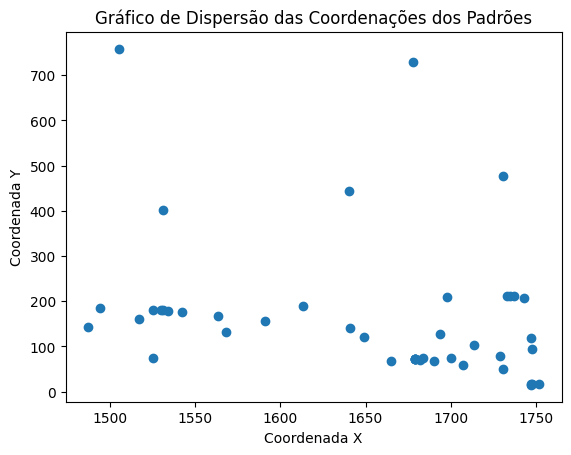

In [ ]:
# Mostrando os dados
plt.scatter(labels[:, 1], labels[:, 2])
plt.title('Gráfico de Dispersão das Coordenações dos Padrões')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

#### Melhorando a visualização

In [ ]:
tipos_interacao = np.unique(labels[:, 0])
"""
0 -> eye
1 -> freeze
2 -> move
3 -> wheel
4 -> click
5 -> keyboard
"""
tipos_interacao

array([1., 2.])

In [ ]:
valores_unicos, contagens = np.unique(labels[:, 0], return_counts=True)
mapeamento = dict(zip(valores_unicos, contagens))

quantidade_1 = mapeamento.get(1, 0)  # O valor padrão é 0 se 42 não estiver presente

print("Quantidade de capturas de freeze:", quantidade_1)

Quantidade de capturas de freeze: 4


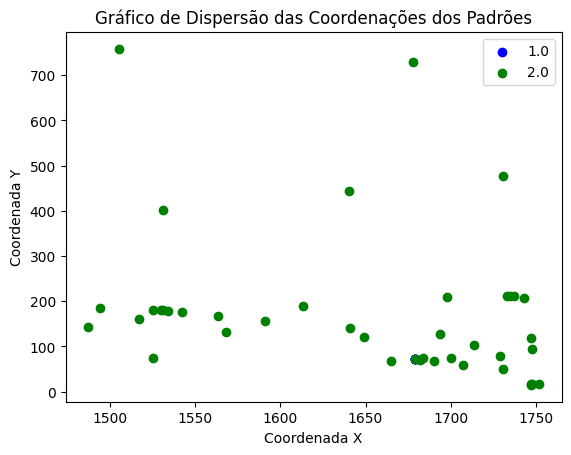

In [ ]:
cores = ['b', 'g']

# Crie um gráfico de dispersão para cada tipo de interação
for i, tipo in enumerate(tipos_interacao):
    indices = labels[:, 0] == tipo
    plt.scatter(labels[indices, 1], labels[indices, 2], label=tipo, color=cores[i])

plt.title('Gráfico de Dispersão das Coordenações dos Padrões')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend(loc='best')  # Adicione uma legenda
plt.show()

### Tentando de outra maneira

In [ ]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

In [ ]:
weights.shape

(10, 10, 6)

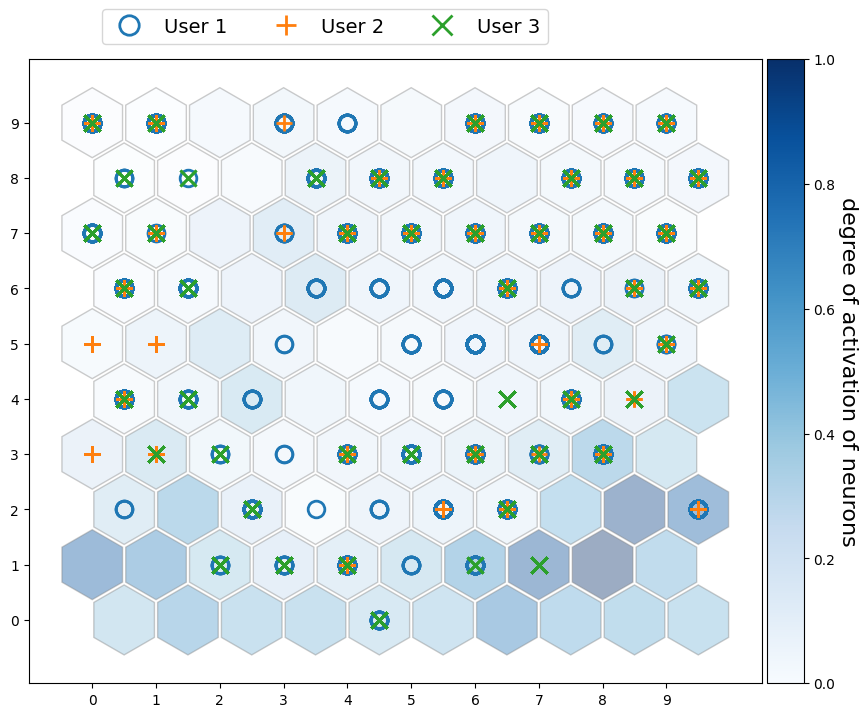

In [ ]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy),
                             numVertices=6,
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]),
                             alpha=.4,
                             edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data_normalized):

    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w)
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy,
             markers[t[cnt]-1],
             markerfacecolor='None',
             markeredgecolor=colors[t[cnt]-1],
             markersize=12,
             markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues,
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('degree of activation of neurons',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='User 1',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='User 2',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='User 3',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left',
          borderaxespad=0., ncol=3, fontsize=14)

plt.savefig('som_seed_hex.png')
plt.show()